# dataset analysis

pulling out some interesting info from the lichess data

## turn number distribution

100%|██████████| 1000/1000 [00:03<00:00, 305.44it/s]


<AxesSubplot:ylabel='Proportion'>

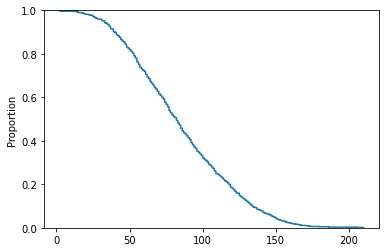

In [3]:
import os

import seaborn as sns
import chess.pgn
from tqdm import tqdm

from src.data_utils.loader import stream_games

# TODO: grab from user's config
LICHESS_DATA = 'data/lichess'
SAMPLE_GAMES = 1000

game_stream = stream_games(LICHESS_DATA)

turns = []
for _ in tqdm(range(SAMPLE_GAMES)):
    game = next(game_stream)
    turns.append(sum(1 for _ in game.mainline_moves()))

sns.ecdfplot(turns, complementary=1)

## board value distribution

100%|██████████| 10000/10000 [01:42<00:00, 97.23it/s]


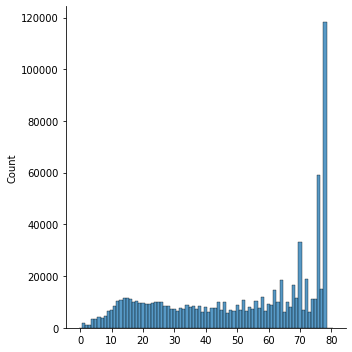

In [81]:
import os

import seaborn as sns
import chess.pgn
from tqdm import tqdm

from data_utils.loader import stream_games, stream_boards

# TODO: grab from user's config
LICHESS_DATA = 'data/lichess'
SAMPLE_GAMES = 1000

PIECE_VALUE = {
    chess.PAWN: 1,
    chess.KNIGHT: 3,
    chess.BISHOP: 3,
    chess.ROOK: 5,
    chess.QUEEN: 9,
    chess.KING: 0,
}

def count_pieces(board: chess.Board):
    return sum(len(board.pieces(p, c)) for p in chess.PIECE_TYPES for c in chess.COLORS)

def board_value(board: chess.Board):
    return sum(len(board.pieces(p, c)) * PIECE_VALUE[p] for p in chess.PIECE_TYPES for c in chess.COLORS)

game_stream = stream_games(LICHESS_DATA)

values = []
for _ in tqdm(range(SAMPLE_GAMES)):
    game = next(game_stream)
    for board in stream_moves(game):
        # value = count_pieces(board)
        value = board_value(board)
        values.append(value)

sns.displot(values, discrete=True)

## board value variability 

TODO: how should we measure variability? counting unique board states is probably excessive